<a href="https://colab.research.google.com/github/mahmud-nobe/CS110_pcw/blob/master/CS110_Pre_Class_Work_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Md Mahmudunnobe"
COLLABORATORS = ""

---

# CS110 Pre-class Work 7.2

## Part A. Direct Address Tables
As the first step in setting up a crossword solving algorithm you need to create 2 direct address tables, one to store all the “up” answers-whether correct or not-and one to store all the “across” answers. Write python code to create a direct address table that allows you to:

1. initialize N empty guesses
2. set a guess for the i-th entry
3. clear an incorrect guess for the i-th entry


In [0]:
# initialize a hask table with N element by putting null in every entry
def initialize_guess(N):
  return ['' for i in range(N)]

# set a guess in ith value of a table
def set_guess(table, i, guess):
  table[i] = guess
  return table

# clear the incorrect guess of the ith entry of a table
def clear_incorrect_guess(table, i):
  table[i] = ''
  return table

#raise NotImplementedError()

In [12]:
initialize_guess(4)


['', '', '', '']

## Part B. Social Security

Could we use a direct address table to store a country's entire set of social security numbers (aka id numbers)? Why or why not?


No. In order to do that we need to order each citizen with a number and that number will be the key for their SSN. So we need a HUGE list, where the poeple without SSN will be null. It is not feasible to have so huge list for storing SSN, so we cannot use direct address.

## Part C. Chained Hash-table

## Question 1.

Using the code in the cell below, complete the missing sections of code. You should copy and paste the code in an additional cell and fill in the code there.

In [0]:
import random
import string


def randomword(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))


def empty_hash_table(N):
    return [[] for n in range(N)]


def add_to_hash_table(hash_table, item, hash_function):
    N = len(hash_table)
    # Your code here
    return hash_table


def contains(hash_table, item, hash_function):
    N = len(hash_table)
    # Your code here
    # return true if the item has already been stored in the hash_table


def remove(hash_table, item, hash_function):
    if not contains(hash_table, item, hash_function):
        raise ValueError()
    # Your code here
    return hash_table


def hash_str1(string):
    ans = 0
    for chr in string:
        ans += ord(chr)
    return ans

def hash_str2(string):
    ans=int(ord(string[0]))
    for ix in range(1, len(string)):
        ans = ans ^ ord(string[ix]) 
    return int(bin(ans).split('b')[1])


def hash_str3(string):
    ans = 0
    for chr in string:
        ans = ans * 128 + ord(chr)
    return ans


def hash_str4(string):
    random.seed(ord(string[0]))
    return random.getrandbits(32)

In [0]:
import random
import string


def randomword(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))


def empty_hash_table(N):
    return [[] for n in range(N)]


def add_to_hash_table(hash_table, item, hash_function):
    N = len(hash_table)
    # here as we don't take any key as input, I assume the key is equal to the item
    # so the slot in the table (or key in the hash_table) will be the hash_function of the item
    # but to ensure the key doesn't become larger than N, we take key mode N
    # then we will store item there.
    
    key = hash_function(item) % N
    hash_table[key].append(item)
    return hash_table


def contains(hash_table, item, hash_function):
    N = len(hash_table)
    key = hash_function(item) % N
    for i in hash_table[key]:
      if (i == item): 
        return True
    return False
    # return true if the item has already been stored in the hash_table


def remove(hash_table, item, hash_function):
    if not contains(hash_table, item, hash_function):
        raise ValueError()
    N = len(hash_table)
    key = hash_function(item) % N
    hash_table[key] = []
    return hash_table


def hash_str1(string):
    ans = 0
    for chr in string:
        ans += ord(chr)
    return ans

def hash_str2(string):
    ans=int(ord(string[0]))
    for ix in range(1, len(string)):
        ans = ans ^ ord(string[ix]) 
    return int(bin(ans).split('b')[1])


def hash_str3(string):
    ans = 0
    for chr in string:
        ans = ans * 128 + ord(chr)
    return ans


def hash_str4(string):
    random.seed(ord(string[0]))
    return random.getrandbits(32)
    
    #raise NotImplementedError()

## Question 2.
Using the code, create 100,000 words of 10 characters each.


In [64]:
words = []

for i in range(100000):
  words.append(randomword(10))

words[:10]

# raise NotImplementedError()

['xtrxjayudx',
 'epphinsnsc',
 'ockyqkpbrz',
 'qdmofvrlep',
 'rcqotgsmri',
 'wlmbnzuamv',
 'yvwhkxsuda',
 'wnkjhlpnfz',
 'xjxbvxmmdb',
 'jbfkibpbei']

## Question 3.

Create four chained hash-tables with 5000 slots.

In [0]:

hash_table1 = empty_hash_table(5000)
hash_table2 = empty_hash_table(5000)
hash_table3 = empty_hash_table(5000)
hash_table4 = empty_hash_table(5000)

# raise NotImplementedError()

## Question 4.

Store all the words in each chained hash table using each of the different hash functions.

In [0]:
for word in words:
  add_to_hash_table(hash_table1, word, hash_str1)

for word in words:
  add_to_hash_table(hash_table2, word, hash_str2)

for word in words:
  add_to_hash_table(hash_table3, word, hash_str3)

for word in words:
  add_to_hash_table(hash_table4, word, hash_str4)

# raise NotImplementedError()

## Question 5.

Measure the number of collisions for each hash function.

In [67]:
# if the bucket is not empty than the collision number is the len(bucket) - 1 for that bucket
collision1 = 0
for bucket in hash_table1:
  if(len(bucket) != 0):
    collision1 += len(bucket) - 1
print('Collision in table 1:', collision1)

collision2 = 0
for bucket in hash_table2:
  if(len(bucket) != 0):
    collision2 += len(bucket) - 1
print('Collision in table 2:', collision2)

collision3 = 0
for bucket in hash_table3:
  if(len(bucket) != 0):
    collision3 += len(bucket) - 1
print('Collision in table 3:', collision3)

collision4 = 0
for bucket in hash_table4:
  if(len(bucket) != 0):
    collision4 += len(bucket) - 1
print('Collision in table 4:', collision4)

# raise NotImplementedError()

Collision in table 1: 99823
Collision in table 2: 99984
Collision in table 3: 95000
Collision in table 4: 99974


## Question 6.

For each of the hash functions, how many elements are in a bucket on average (if it is not empty)?


In [68]:
non_empty_bucket1 = 0
for bucket in hash_table1:
  if(len(bucket) != 0):
    non_empty_bucket1 += 1
print('Average elements in table 1:', 100000/non_empty_bucket1)

non_empty_bucket2 = 0
for bucket in hash_table2:
  if(len(bucket) != 0):
    non_empty_bucket2 += 1
print('Average elements in table 2:', 100000/non_empty_bucket2)

non_empty_bucket3 = 0
for bucket in hash_table3:
  if(len(bucket) != 0):
    non_empty_bucket3 += 1
print('Average elements in table 3:', 100000/non_empty_bucket3)

non_empty_bucket4 = 0
for bucket in hash_table4:
  if(len(bucket) != 0):
    non_empty_bucket4 += 1
print('Average elements in table 4:', 100000/non_empty_bucket4)

# raise NotImplementedError()

Average elements in table 1: 564.9717514124294
Average elements in table 2: 6250.0
Average elements in table 3: 20.0
Average elements in table 4: 3846.153846153846


## Question 7.

Time how long it takes to find elements that are in each hash table.


In [79]:
import time

avg_time = []

start = time.time()
for word in words:
  contains(hash_table1, word, hash_str1)
end = time.time()
avg_time.append((end-start)/len(words))
print('Average time for 1 search in Table 1:', avg_time[0])

start = time.time()
for word in words:
  contains(hash_table2, word, hash_str2)
end = time.time()
avg_time.append((end-start)/len(words))
print('Average time for 1 search in Table 2:', avg_time[1])

start = time.time()
for word in words:
  contains(hash_table3, word, hash_str3)
end = time.time()
avg_time.append((end-start)/len(words))
print('Average time for 1 search in Table 3:', avg_time[2])

start = time.time()
for word in words:
  contains(hash_table4, word, hash_str4)
end = time.time()
avg_time.append((end-start)/len(words))
print('Average time for 1 search in Table 4:', avg_time[3])


# raise NotImplementedError()

Average time for 1 search in Table 1: 4.0637643337249756e-05
Average time for 1 search in Table 2: 0.0001810192084312439
Average time for 1 search in Table 3: 3.103652000427246e-06
Average time for 1 search in Table 4: 0.00013237826347351075


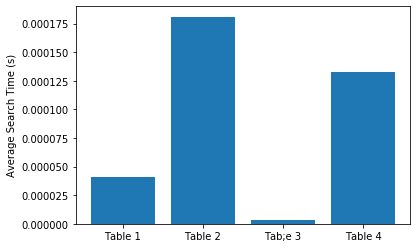

In [80]:
import matplotlib.pyplot as plt

plt.bar(['Table 1', 'Table 2', 'Tab;e 3', 'Table 4'], avg_time)
plt.ylabel('Average Search Time (s)')
plt.show()

## Question 8.
For each hash table, time how long it takes to find 10,000 elements that have not been stored.

In [81]:

new_words = []

for i in range(10000):
  new_words.append(randomword(10))

avg_unsuccess_time = []

start = time.time()
for word in new_words:
  contains(hash_table1, word, hash_str1)
end = time.time()
avg_unsuccess_time.append((end-start)/len(new_words))
print('Average time for 1 unsuccessful search in Table 1:', avg_unsuccess_time[0])

start = time.time()
for word in new_words:
  contains(hash_table2, word, hash_str2)
end = time.time()
avg_unsuccess_time.append((end-start)/len(new_words))
print('Average time for 1 unsuccessful search in Table 2:', avg_unsuccess_time[1])

start = time.time()
for word in new_words:
  contains(hash_table3, word, hash_str3)
end = time.time()
avg_unsuccess_time.append((end-start)/len(new_words))
print('Average time for 1 unsuccessful search in Table 3:', avg_unsuccess_time[2])

start = time.time()
for word in new_words:
  contains(hash_table4, word, hash_str4)
end = time.time()
avg_unsuccess_time.append((end-start)/len(new_words))
print('Average time for 1 unsuccessful search in Table 4:', avg_unsuccess_time[3])

# raise NotImplementedError()

Average time for 1 unsuccessful search in Table 1: 9.726223945617676e-05
Average time for 1 unsuccessful search in Table 2: 0.0004925798654556275
Average time for 1 unsuccessful search in Table 3: 4.5315265655517575e-06
Average time for 1 unsuccessful search in Table 4: 0.0003327640771865845


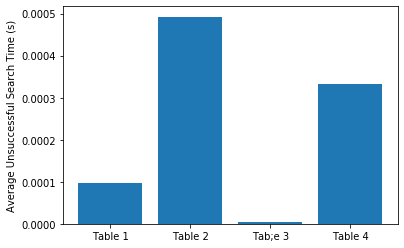

In [82]:
plt.bar(['Table 1', 'Table 2', 'Tab;e 3', 'Table 4'], avg_unsuccess_time)
plt.ylabel('Average Unsuccessful Search Time (s)')
plt.show()